In [32]:
import pandas as pd
from datasets import load_dataset
from dotenv import load_dotenv

In [33]:
load_dotenv()

True

#### Load csv files

In [2]:
df1 = pd.read_csv("labels_file1.csv")
df2 = pd.read_csv("labels_file2.csv")
df1.shape, df2.shape

((275, 2), (1410, 2))

#### Document Name Column

In [3]:
df1.loc[:, "Document"] = "2022-denver-green-code.pdf"
df2.loc[:, "Document"] = "20201119Complete_Denver_Zoning_Code_updated11122020.pdf"

#### Page Column

In [4]:
df1.loc[:, "Page"] = df1["local_image_path"].str.extract(r"/(\d+)_").astype(int)
df2.loc[:, "Page"] = df2["local_image_path"].str.extract(r"/(\d+)_").astype(int)

#### Merge the two dataframes

In [5]:
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,local_image_path,label,Document,Page
0,data/1_2022-denver-green-code.png,COVER_PAGE,2022-denver-green-code.pdf,1
1,data/2_2022-denver-green-code.png,COVER_PAGE,2022-denver-green-code.pdf,2
2,data/3_2022-denver-green-code.png,TEXT_PAGE,2022-denver-green-code.pdf,3
3,data/4_2022-denver-green-code.png,TEXT_PLUS_TABLE_PAGE,2022-denver-green-code.pdf,4
4,data/5_2022-denver-green-code.png,TEXT_PAGE,2022-denver-green-code.pdf,5


In [6]:
df.tail(5)

,local_image_path,label,Document,Page
1680,data/1406_20201119Complete_Denver_Zoning_Code_...,TEXT_PAGE,20201119Complete_Denver_Zoning_Code_updated111...,1406
1681,data/1407_20201119Complete_Denver_Zoning_Code_...,TEXT_PAGE,20201119Complete_Denver_Zoning_Code_updated111...,1407
1682,data/1408_20201119Complete_Denver_Zoning_Code_...,TEXT_PAGE,20201119Complete_Denver_Zoning_Code_updated111...,1408
1683,data/1409_20201119Complete_Denver_Zoning_Code_...,TEXT_PAGE,20201119Complete_Denver_Zoning_Code_updated111...,1409
1684,data/1410_20201119Complete_Denver_Zoning_Code_...,TEXT_PAGE,20201119Complete_Denver_Zoning_Code_updated111...,1410


In [7]:
df.to_csv("final_labels.csv", index=False)

#### Metadata

In [24]:
metadata = df.copy()[["local_image_path", "label"]]
metadata.columns = ["file_name", "label"]
metadata.loc[:, "file_name"] = metadata["file_name"].str.split("/").str[1]
metadata.to_csv("data/metadata.csv", index=False)

#### Dataset HF

In [26]:
dataset = load_dataset("imagefolder", data_dir="data/")

Resolving data files:   0%|          | 0/1686 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [29]:
dataset["train"][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2550x3300>,
 'label': 'TEXT_PLUS_DIAGRAM_PAGE'}

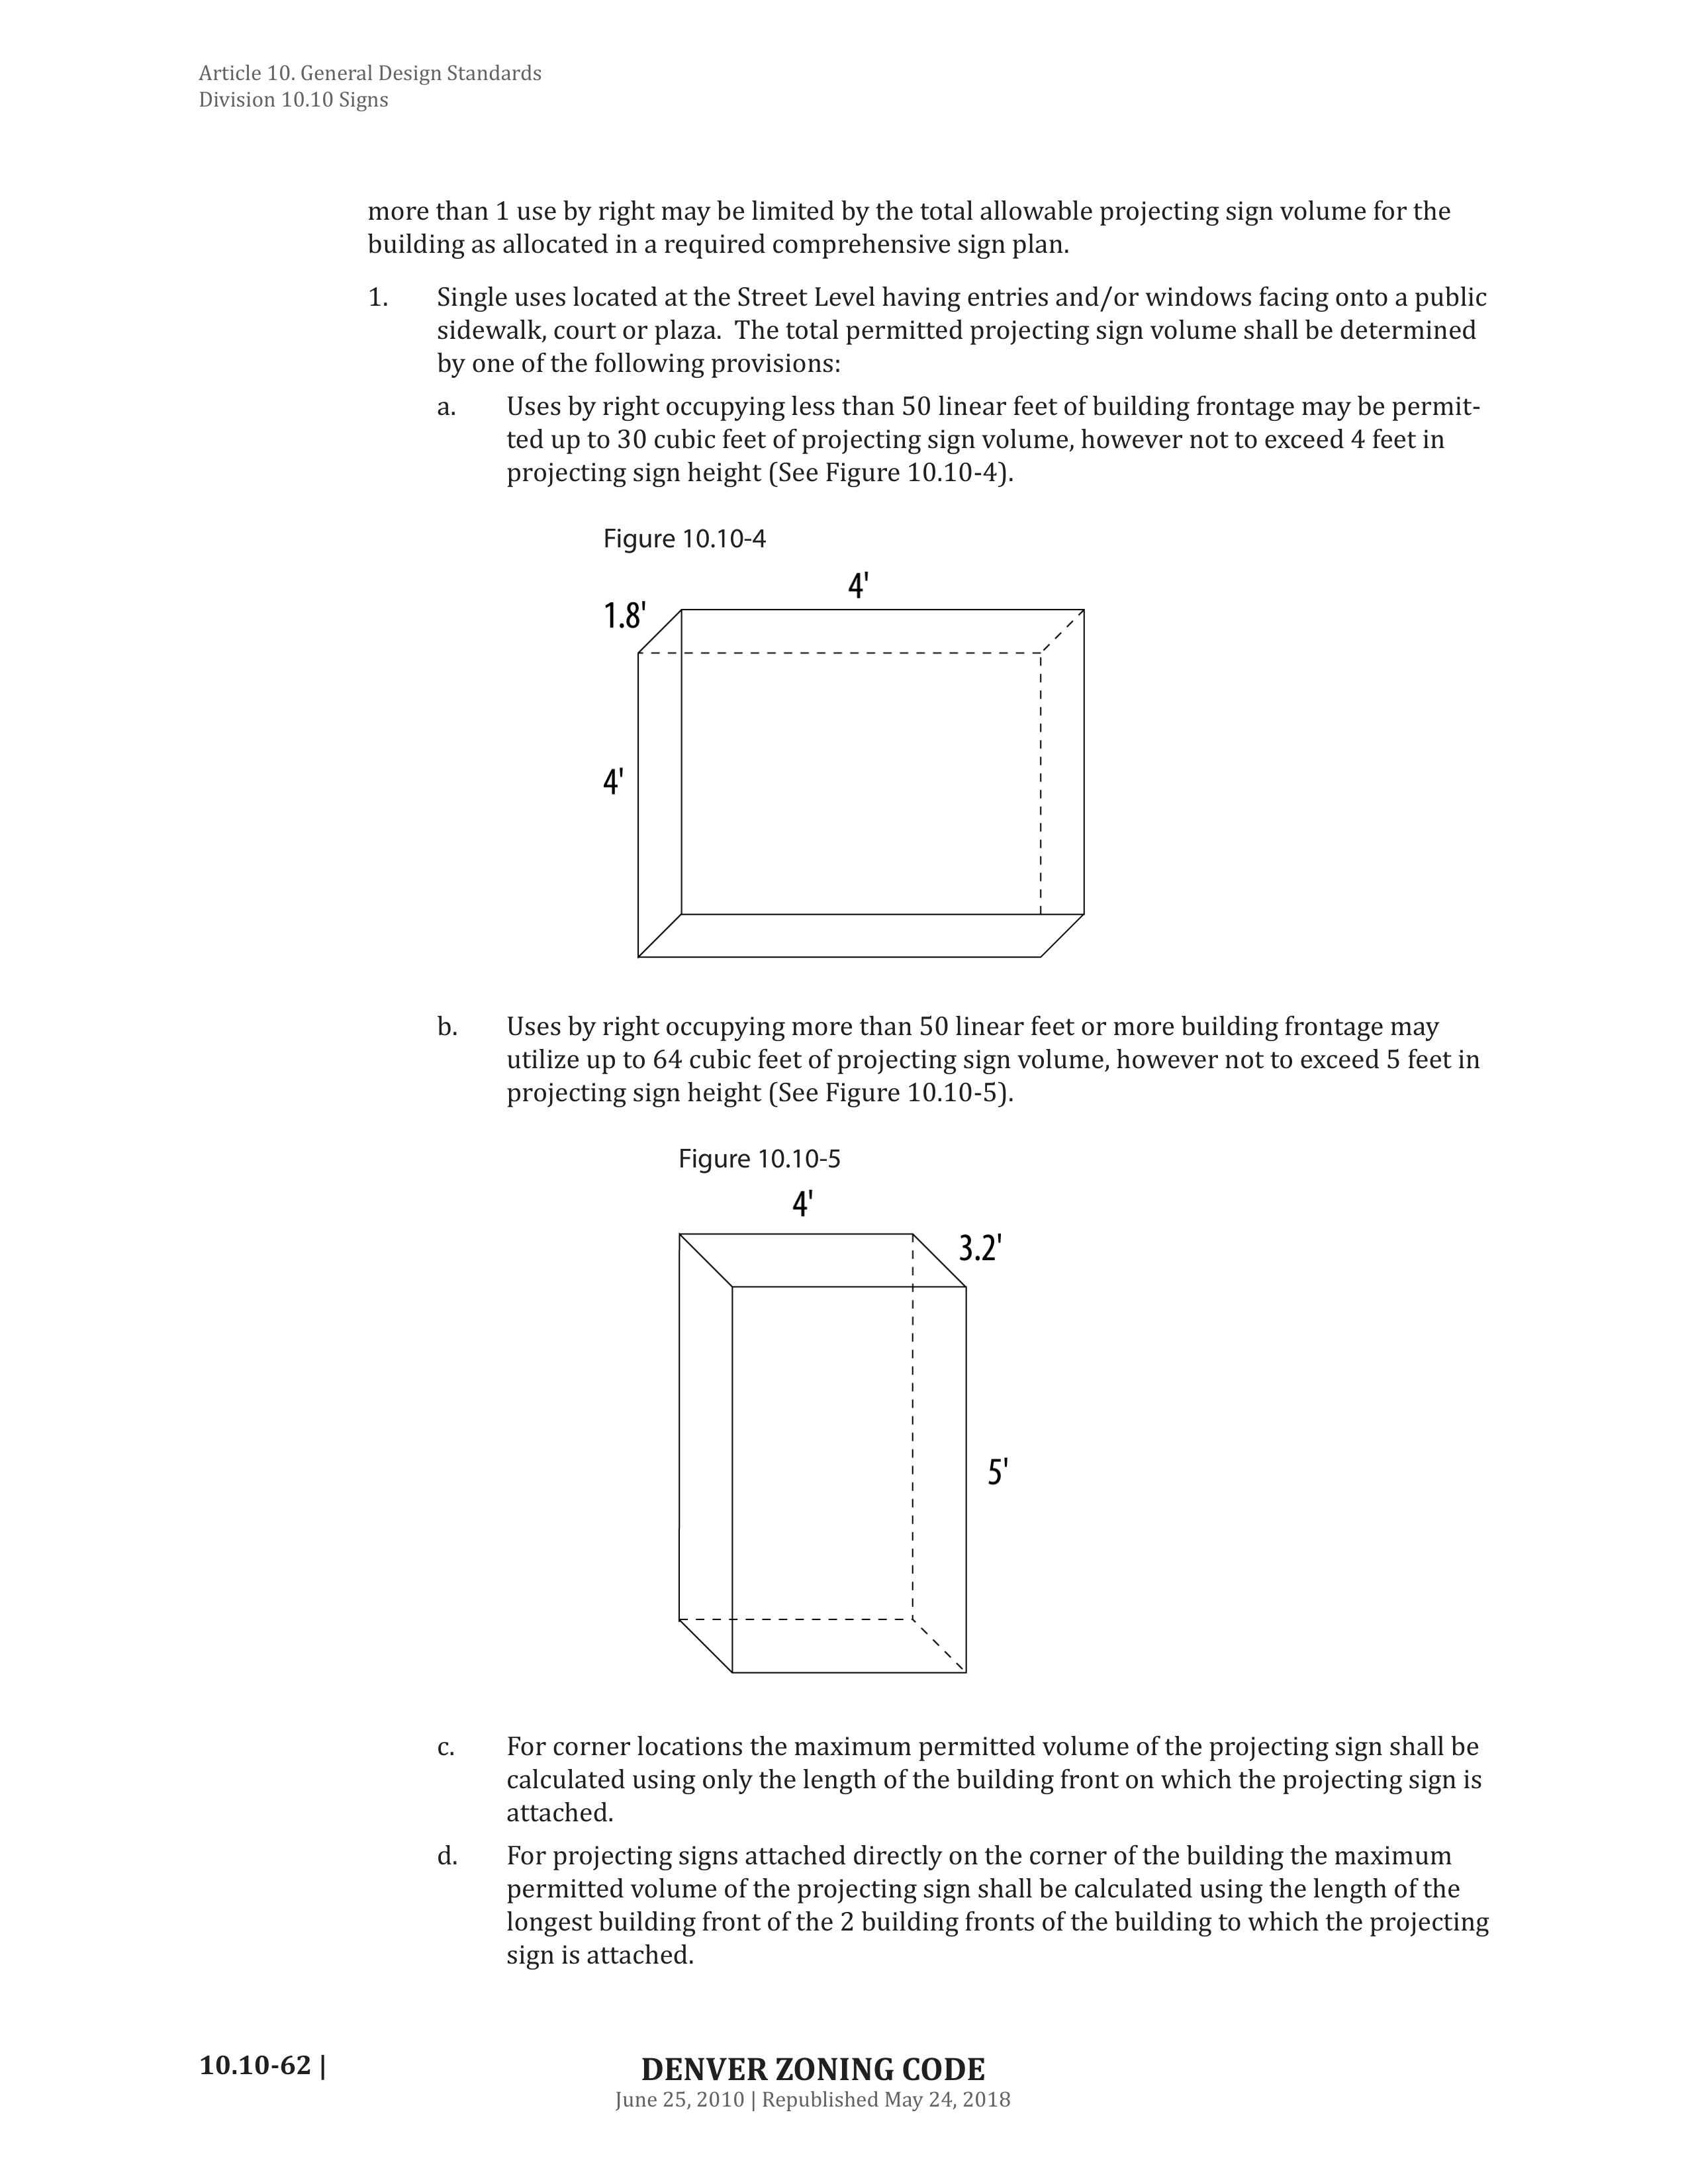

In [30]:
dataset["train"][0]["image"]

In [36]:
dataset.push_to_hub("gpt-pdf-classifier-1")

Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/562 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

Map:   0%|          | 0/562 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

Map:   0%|          | 0/561 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/jjovalle99/gpt-pdf-classifier-1/commit/0db270254429ca8adc18ad4c5ea2886f48135bd7', commit_message='Upload dataset', commit_description='', oid='0db270254429ca8adc18ad4c5ea2886f48135bd7', pr_url=None, pr_revision=None, pr_num=None)